In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#copy/paste the cleaning from previous jupyter notebook for consistency
williamson_housing = "williamson_data/williamson_housing.csv"
travis_occupancy = "Travis_County_Data/Occupancy.csv"
hays_total_housing_units = "hays_data/hays_total_housing_units.csv"


hays_total_housing_units_data_df = pd.read_csv(hays_total_housing_units,thousands = ",")
hays_total_housing_units_data_clean_df = hays_total_housing_units_data_df.dropna(how = "any")

williamson_housing_data_df = pd.read_csv(williamson_housing,sep='\t',thousands = ",")

travis_occupancy_data_df = pd.read_csv(travis_occupancy)


In [3]:
#make df for occupied hays housing
hays_total_housing_units_data_clean_df = hays_total_housing_units_data_clean_df.drop(["2006"], axis = 1)

occupied_hays = hays_total_housing_units_data_clean_df.drop([0,2,3,4])

occupied_hays

,HOUSING OCCUPANCY,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Occupied housing units,44803.0,47008.0,48709.0,54422.0,56754.0,57395.0,60739.0,63497.0,67346.0,71267.0


In [4]:
#make df for just vacant hays housing
vacant_hays = hays_total_housing_units_data_clean_df.drop([0,1,3,4])
vacant_hays

,HOUSING OCCUPANCY,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,Vacant housing units,4583.0,4258.0,4467.0,5325.0,5079.0,6943.0,6568.0,7232.0,5631.0,4219.0


In [5]:
#make df for occupied williamson
occupied_williamson = williamson_housing_data_df.drop([0,2,3,4])
occupied_williamson

,HOUSING OCCUPANCY,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Occupied housing units,121899.0,127842.0,132992.0,152739.0,156738.0,156215.0,161887.0,164805.0,170987.0,173125.0


In [6]:
#make df for vacant williamson
vacant_williamson = williamson_housing_data_df.drop([0,1,3,4])
vacant_williamson

,HOUSING OCCUPANCY,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,Vacant housing units,9274.0,9109.0,9245.0,10525.0,11785.0,10988.0,9257.0,10868.0,10013.0,13850.0


In [7]:
#make df for occupied travis
occupied_travis = travis_occupancy_data_df.drop([0,2,3,4])
occupied_travis

,HOUSING OCCUPANCY,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Occupied housing units,366784.0,368578.0,381307.0,391589.0,403638.0,410683.0,414318.0,428889.0,437375.0,446342.0,457810.0


In [8]:
#make df for vacant travis
vacant_travis = travis_occupancy_data_df.drop([0,1,3,4])
vacant_travis

,HOUSING OCCUPANCY,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,Vacant housing units,38051.0,36703.0,37118.0,36557.0,38697.0,36442.0,36558.0,32662.0,37582.0,40202.0,41223.0


In [9]:
#make a df for total occupied housing
total_occupied = pd.concat([occupied_travis,occupied_williamson,occupied_hays], ignore_index = True)
total_occupied = total_occupied.drop(["2006","HOUSING OCCUPANCY"], axis = 1) 
total_occupied

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,368578.0,381307.0,391589.0,403638.0,410683.0,414318.0,428889.0,437375.0,446342.0,457810.0
1,121899.0,127842.0,132992.0,152739.0,156738.0,156215.0,161887.0,164805.0,170987.0,173125.0
2,44803.0,47008.0,48709.0,54422.0,56754.0,57395.0,60739.0,63497.0,67346.0,71267.0


In [10]:
#get sums of occupied for plotting
occupied_sums = total_occupied.sum(axis = 0)
occupied_sums

2007    535280.0
2008    556157.0
2009    573290.0
2010    610799.0
2011    624175.0
2012    627928.0
2013    651515.0
2014    665677.0
2015    684675.0
2016    702202.0
dtype: float64

In [75]:
#make total vacant df
total_vacant = pd.concat([vacant_travis,vacant_williamson,vacant_hays], ignore_index = True)
total_vacant = total_vacant.drop(["2006","HOUSING OCCUPANCY"], axis = 1) 
total_vacant

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,36703.0,37118.0,36557.0,38697.0,36442.0,36558.0,32662.0,37582.0,40202.0,41223.0
1,9274.0,9109.0,9245.0,10525.0,11785.0,10988.0,9257.0,10868.0,10013.0,13850.0
2,4583.0,4258.0,4467.0,5325.0,5079.0,6943.0,6568.0,7232.0,5631.0,4219.0


In [76]:
#get sums of vacant for plotting
vacant_sums = total_vacant.sum(axis = 0)
vacant_sums


2007    50560.0
2008    50485.0
2009    50269.0
2010    54547.0
2011    53306.0
2012    54489.0
2013    48487.0
2014    55682.0
2015    55846.0
2016    59292.0
dtype: float64

In [77]:
total_occupied = [535280,556157,573290,610799,624175,627928,651515,665677,684675,702202]
total_vacant = [50560,50485,50269,54547,53306,54489,48487,55682,55846,59292]
x_axis = np.arange(len(total_occupied))

In [78]:
plt.bar(x_axis, total_vacant, color = "r")
plt.bar(x_axis, total_occupied, bottom = total_vacant, color = "b")

<Container object of 10 artists>

In [79]:
plt.xticks(x_axis, ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016"])
plt.ylim(0,775000,100000)
plt.xlabel("Year")
plt.ylabel("Number of Houses")
plt.title("Total House Occupancy in Austin")

Text(0.5,1,'Total House Occupancy in Austin')

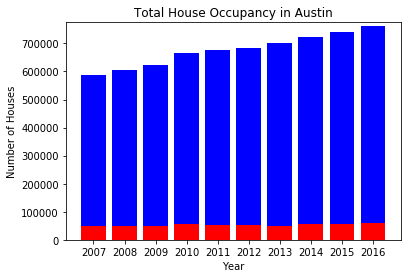

In [80]:
plt.show()

In [81]:
plt.savefig("Saved_Pngs/total_occupancy_bar_chart.png")